<a href="https://colab.research.google.com/github/gilsu200/DL_study/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mnist데이터 훈련



**케라스에서 MNIST 데이터셋 적재하기**

In [11]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**신경망 구조**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #중간층 relu
    layers.Dense(10, activation="softmax") #다중분류 softmax
])

**컴파일 단계**

In [13]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 준비하기(정규화,실수)**

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**모델 훈련**

In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2663 - accuracy: 0.9229
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1060 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0699 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0520 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0384 - accuracy: 0.9888


**모델을 사용해 예측 만들기**

In [16]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 50ms/step


array([7.3320550e-09, 1.1396594e-09, 2.3563191e-06, 1.0738238e-05,
       4.1708435e-11, 8.2207933e-08, 1.9214159e-13, 9.9998516e-01,
       4.6286395e-08, 1.5433134e-06], dtype=float32)

**새로운 데이터에서 모델 평가하기**

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0646 - accuracy: 0.9795
테스트 정확도: 0.9794999957084656


# 속성,텐서, 데이터시각화

### 핵심 속성(차원,샘플,타입)

In [18]:
train_images.ndim
train_images.shape
train_images.dtype

dtype('float32')

### 랭크-3 텐서

In [19]:
import numpy as np
x=np.array([[[1,2,3],
             [4,5,6],
             [7,8,9]],
            [[3,2,1],
             [6,5,4],
             [9,8,7]],
            [[1,2,3],
             [4,5,6],
             [7,8,9]]])
x.ndim


3

### - mnist 테스트 데이터 세트에서 1번째 숫자 시각화 시도(1번째 숫자 데이터 = test_images[0])

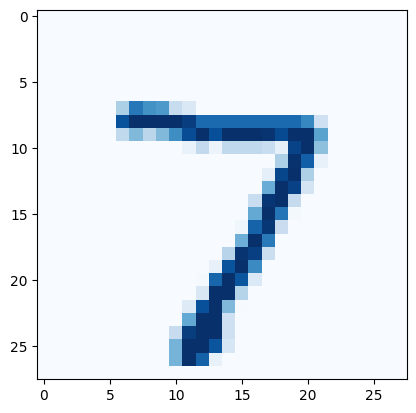

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

import matplotlib.pyplot as plt
digit=test_images[0]
plt.imshow(digit,cmap=plt.cm.Blues)
plt.show()

### 1번째 숫자를 조작하고 시각화해 보세요.

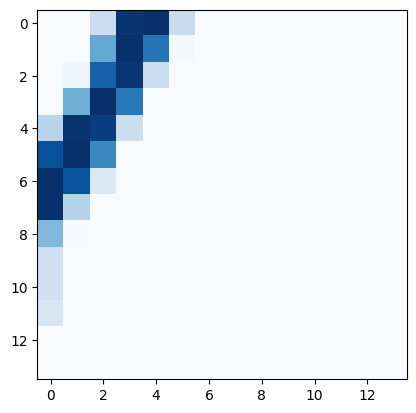

In [24]:
mani_data=test_images[0,14:,14:]
import matplotlib.pyplot as plt
digit=mani_data
plt.imshow(digit,cmap=plt.cm.Blues)
plt.show()

# Naive function,브로드캐스팅,reshaping

### Try to use naïve version of relu and add functions.

In [25]:
#naive relu
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [26]:
#naive add
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
#naive 곱셈
def naive_mul(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] *= y[i, j]
    return x


In [ ]:
#naive 점곱
def naive_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]

    z = np.zeros((x.shape[0], y.shape[1]))

    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            for k in range(x.shape[1]):
                z[i, j] += x[i, k] * y[k, j]

    return z


### Try to use broadcasting with your own example.

In [27]:
import numpy as np
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([10, 20, 30])
result = A + B
result

array([[11, 22, 33],
       [14, 25, 36]])

### Try reshaping code

In [28]:
train_images = train_images.reshape((60000, 28 * 28))

In [29]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x = x.reshape((6, 1))
print(x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [30]:
#transpose
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

# Gradient-based optimization(기울기)


### Say x, y are scalar, find derivatives of  f(x,y)=(x^2)*y+x*y+3*y with respect to x and y. (Set x = 2, y = 1 for the calculation)

In [31]:
import tensorflow as tf

x = tf.Variable(2.)
y = tf.Variable(1.)

with tf.GradientTape(persistent=True) as tape:
     z = x**2 * y + x * y + 3 * y

grad_of_z_wrt_x = tape.gradient(z, x)
grad_of_z_wrt_y = tape.gradient(z, y)
print(grad_of_z_wrt_x)
print(grad_of_z_wrt_y)



tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32)


### Find derivatives of f(W,b)=(x*W+b) with respect to W and b

In [32]:
import tensorflow as tf
import numpy as np

x = tf.constant(np.array([1., 4., 3.]).reshape(1, 3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3, 2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)

with tf.GradientTape(persistent=True) as tape:
    y = tf.matmul(x, W) + b

grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(grad_of_y_wrt_W_and_b)

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [4., 4.],
       [3., 3.]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>]


### Find derivatives of f(W,b)=(x*W+b)^3 with respect to W and b

In [33]:
import tensorflow as tf
import numpy as np

x = tf.constant(np.array([1., 4., 3.]).reshape(1, 3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3, 2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)

with tf.GradientTape(persistent=True) as tape:
    y = tf.pow(tf.matmul(x, W) + b, 3)

grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(grad_of_y_wrt_W_and_b)


[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 95.358696,  71.76376 ],
       [381.43478 , 287.05505 ],
       [286.07608 , 215.29129 ]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([95.358696, 71.76376 ], dtype=float32)>]


# Weights(가중치)

### Check weights from defined models.

In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [35]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [36]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [37]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2667 - accuracy: 0.9223
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1084 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0714 - accuracy: 0.9783
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0520 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0382 - accuracy: 0.9885


In [38]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02894792,  0.06733403, -0.06140079, ...,  0.01161557,
         -0.06587682,  0.06203414],
        [ 0.02376413, -0.03113754,  0.00887804, ..., -0.04748422,
          0.03044175, -0.03381704],
        [ 0.009471  ,  0.04759172,  0.04305018, ..., -0.02882617,
          0.05597888,  0.04357993],
        ...,
        [-0.02470146, -0.0190561 ,  0.04974707, ..., -0.04236445,
          0.06727187, -0.04599019],
        [-0.00820934, -0.06664073,  0.04888058, ..., -0.01706331,
         -0.02777917,  0.00650783],
        [ 0.02538487, -0.00608719, -0.02524576, ...,  0.06665009,
         -0.00117544, -0.03354911]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(512,) dtype=float32, numpy=
 array([-2.00607954e-03,  6.81701396e-03,  3.19591872e-02,  2.59231832e-02,
        -1.11776190e-02,  7.57664500e-04,  1.34750847e-02,  3.15808654e-02,
         1.32431602e-02, -3.79387708e-03,  5.06071933e-02,  2.10153

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Try running Naïve version of model and check weights.


In [40]:
#ch2 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

# Two class classification, linear classifier

### For two class classification model, try to visualize classification results at batch 5, 10, 15 and 20.

###  Try to modify your linear classifier not using bias term (b). Try to fit your model, what happens?


In [41]:
# ch3 텐서플로우선형분류기 예제

# Classifying movie reviews(이진분류)

In [42]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [43]:
import numpy as np #단어시퀀스데이터 이진행렬로 변환
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [44]:
y_train = np.asarray(train_labels).astype("float32") #레이블데이터 부동소수점형태로
y_test = np.asarray(test_labels).astype("float32")

In [45]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") #출력층 sigmoid
])

In [46]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", #binary
              metrics=["accuracy"])

In [47]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [48]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 181ms/step - loss: 0.5432 - accuracy: 0.7665 - val_loss: 0.4128 - val_accuracy: 0.8544
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3312 - accuracy: 0.8907 - val_loss: 0.3567 - val_accuracy: 0.8551
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2479 - accuracy: 0.9167 - val_loss: 0.2998 - val_accuracy: 0.8772
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1992 - accuracy: 0.9323 - val_loss: 0.2742 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1672 - accuracy: 0.9450 - val_loss: 0.2778 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1392 - accuracy: 0.9565 - val_loss: 0.3221 - val_accuracy: 0.8764
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1233 - accuracy: 0.9591 - val_loss: 0.2944 - val_accuracy: 0.8837
Epoch 8/20
3

In [49]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

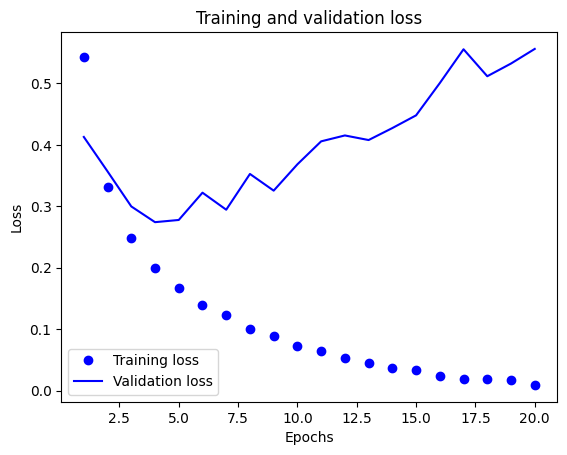

In [50]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

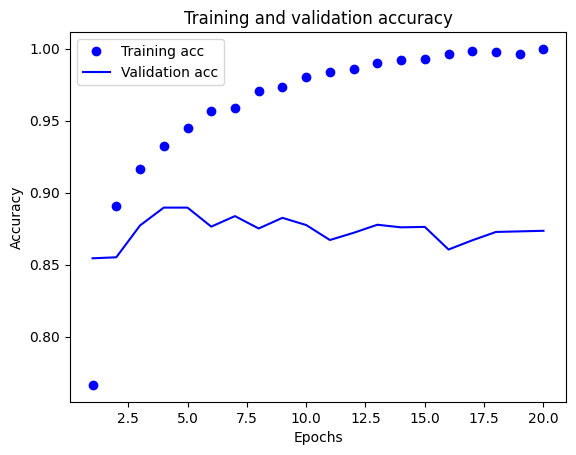

In [51]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512) #epoch 과대적합 전으로 조정
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4763 - accuracy: 0.8146
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2764 - accuracy: 0.9013
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2176 - accuracy: 0.9205
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2913 - accuracy: 0.8839


In [53]:
results

[0.29134050011634827, 0.8839200139045715]

In [54]:
model.predict(x_test)

782/782 [==============================] - 3s 2ms/step


array([[0.17951924],
       [0.99959654],
       [0.6330416 ],
       ...,
       [0.07759629],
       [0.05698888],
       [0.42653984]], dtype=float32)

### Try fitting logistic regression, and check validation loss and accuracy


In [56]:
#mnist data logistic regression

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

from tensorflow import keras
from keras import layers

model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6821 - accuracy: 0.8310 - val_loss: 0.3603 - val_accuracy: 0.9047
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3537 - accuracy: 0.9031 - val_loss: 0.3100 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.9121 - val_loss: 0.2938 - val_accuracy: 0.9191
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.9161 - val_loss: 0.2847 - val_accuracy: 0.9232
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2920 - accuracy: 0.9191 - val_loss: 0.2797 - val_accuracy: 0.9228
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2852 - accuracy: 0.9207 - val_loss: 0.2762 - val_accuracy: 0.9242
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.9208 - val_loss: 0.2720 - val_accuracy: 0.9258
Epoch 

In [57]:
#imdb data logistic regression

from tensorflow import keras
from keras import layers
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 3s 14ms/step - loss: 0.5802 - accuracy: 0.8188 - val_loss: 0.3740 - val_accuracy: 0.8754
Epoch 2/20
157/157 [==============================] - 2s 10ms/step - loss: 0.3088 - accuracy: 0.9013 - val_loss: 0.3111 - val_accuracy: 0.8890
Epoch 3/20
157/157 [==============================] - 2s 10ms/step - loss: 0.2512 - accuracy: 0.9169 - val_loss: 0.2933 - val_accuracy: 0.8882
Epoch 4/20
157/157 [==============================] - 2s 10ms/step - loss: 0.2210 - accuracy: 0.9266 - val_loss: 0.2733 - val_accuracy: 0.8946
Epoch 5/20
157/157 [==============================] - 2s 10ms/step - loss: 0.2005 - accuracy: 0.9348 - val_loss: 0.2685 - val_accuracy: 0.8930
Epoch 6/20
157/157 [==============================] - 2s 10ms/step - loss: 0.1855 - accuracy: 0.9399 - val_loss: 0.2705 - val_accuracy: 0.8934
Epoch 7/20
157/157 [==============================] - 2s 15ms/step - loss: 0.1733 - accuracy: 0.9442 - val_loss: 0.2677 - val_accuracy: 0.8936

# Classifying newswires(다중분류)

In [58]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [59]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [60]:
#원핫 인코딩
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [61]:
#원핫 인코딩 내장함수
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [62]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") #다중분류 마지막 층 크기는 n
])

In [63]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #원핫인코딩 했을시 categorical
              metrics=["accuracy"])

In [64]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [65]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.7659 - accuracy: 0.4401 - val_loss: 1.8940 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.5609 - accuracy: 0.6848 - val_loss: 1.4048 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 1s 57ms/step - loss: 1.1743 - accuracy: 0.7526 - val_loss: 1.1864 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 1s 82ms/step - loss: 0.9535 - accuracy: 0.7975 - val_loss: 1.0879 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 1s 80ms/step - loss: 0.7881 - accuracy: 0.8330 - val_loss: 1.0077 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6528 - accuracy: 0.8609 - val_loss: 0.9534 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5439 - accuracy: 0.8839 - val_loss: 0.9029 - val_accuracy: 0.8070
Epoch 8/20
16

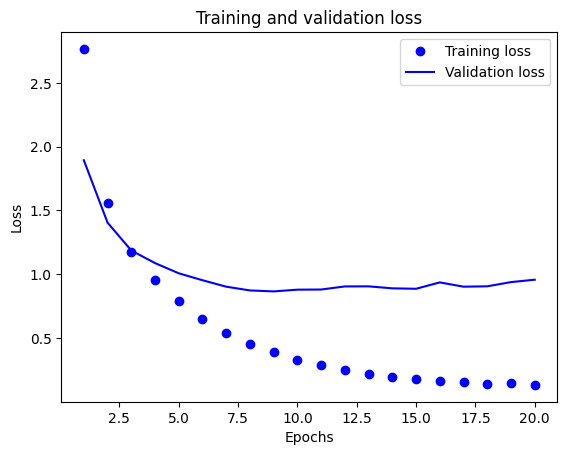

In [66]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

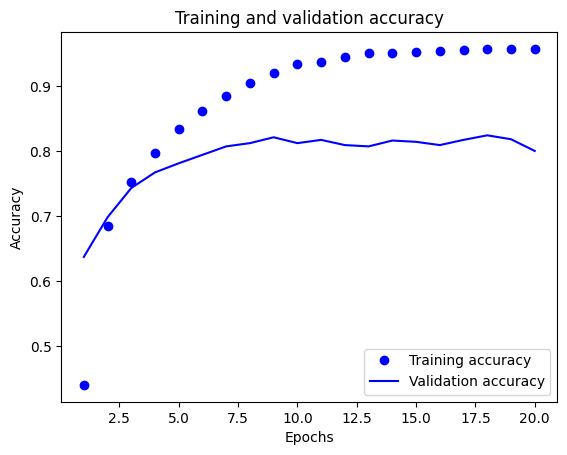

In [67]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [68]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9, #epoch 수정
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 42ms/step - loss: 2.6593 - accuracy: 0.5091
Epoch 2/9
18/18 [==============================] - 1s 40ms/step - loss: 1.4978 - accuracy: 0.6807
Epoch 3/9
18/18 [==============================] - 1s 39ms/step - loss: 1.1447 - accuracy: 0.7511
Epoch 4/9
18/18 [==============================] - 1s 39ms/step - loss: 0.9232 - accuracy: 0.8039
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.7679 - accuracy: 0.8365
Epoch 6/9
18/18 [==============================] - 1s 42ms/step - loss: 0.6423 - accuracy: 0.8633
Epoch 7/9
18/18 [==============================] - 1s 39ms/step - loss: 0.5366 - accuracy: 0.8870
Epoch 8/9
18/18 [==============================] - 1s 39ms/step - loss: 0.4571 - accuracy: 0.9035
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9078 - accuracy: 0.7943


In [69]:
results

[0.9078160524368286, 0.7943009734153748]

In [70]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

71/71 [==============================] - 0s 4ms/step


3

### Solve the same problem without using one-hot encoding y variable(레이블을 정수텐서로 변환)

In [71]:
#원핫 인코딩하지않고 정수텐서로 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [72]:
#정수텐서 사용시 categorical_crossentropy대신 sparse_categorical_crossentropy 사용
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Predicting house prices(회귀문제)

In [73]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [74]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [75]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [76]:
from tensorflow import keras
from tensorflow.keras import layers

In [77]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [78]:
all_scores

[1.8585329055786133,
 2.3997325897216797,
 2.4686167240142822,
 2.4474785327911377]

In [79]:
np.mean(all_scores)

2.2935901880264282

In [80]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [81]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

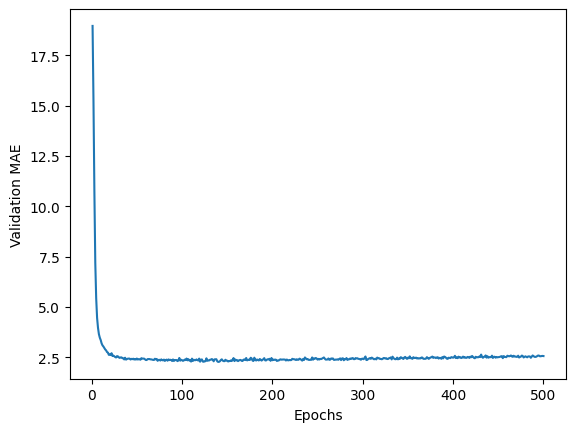

In [82]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

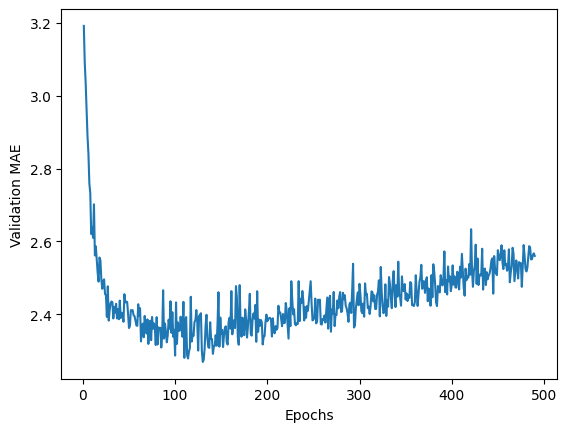

In [83]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [84]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 13.5860 - mae: 2.5409


In [85]:
test_mae_score

2.5408780574798584

In [86]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 4ms/step


array([7.953213], dtype=float32)

### Try to visualize results (validation accuracy or validation loss) for comparison


In [87]:
num_epochs=130
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

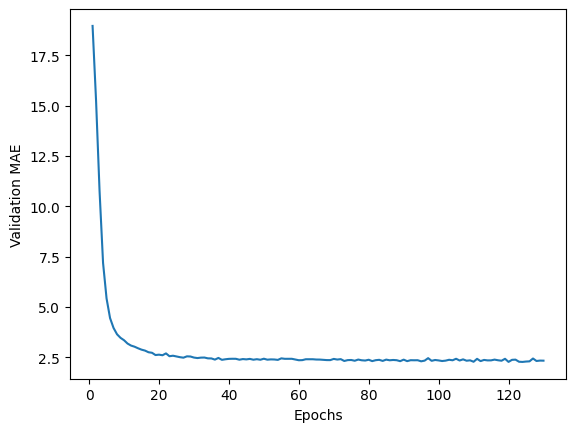

In [88]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

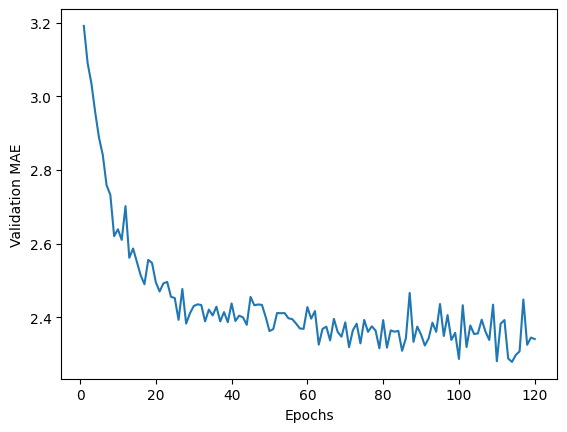

In [89]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Noise, all-zero, shuffle, learning rates, capacity, dropout


### From Training the same model on MNIST data with noise channels or all-zero channels Add validation accuracy of original data for mnist data.

In [90]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [91]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 23ms/step - loss: 0.6221 - accuracy: 0.8109 - val_loss: 0.2842 - val_accuracy: 0.9173
Epoch 2/10
375/375 [==============================] - 7s 19ms/step - loss: 0.2614 - accuracy: 0.9208 - val_loss: 0.1830 - val_accuracy: 0.9468
Epoch 3/10
375/375 [==============================] - 7s 20ms/step - loss: 0.1706 - accuracy: 0.9473 - val_loss: 0.1805 - val_accuracy: 0.9423
Epoch 4/10
375/375 [==============================] - 7s 20ms/step - loss: 0.1221 - accuracy: 0.9624 - val_loss: 0.1419 - val_accuracy: 0.9578
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0902 - accuracy: 0.9717 - val_loss: 0.1577 - val_accuracy: 0.9528
Epoch 6/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0670 - accuracy: 0.9794 - val_loss: 0.1441 - val_accuracy: 0.9603
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.1264 - val_accuracy: 0.9674

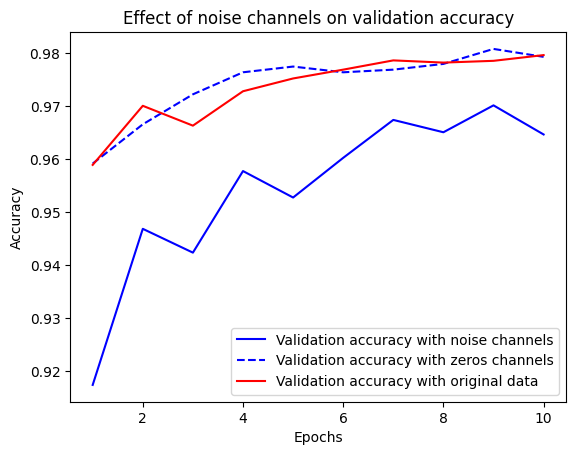

In [92]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r-",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Fitting a MNIST model with randomly shuffled labels. Visualize training accuracy and validation accuracy.


Epoch 1/100
375/375 [==============================] - 11s 28ms/step - loss: 2.3155 - accuracy: 0.1025 - val_loss: 2.3055 - val_accuracy: 0.1038
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2993 - accuracy: 0.1173 - val_loss: 2.3113 - val_accuracy: 0.0996
Epoch 3/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2895 - accuracy: 0.1276 - val_loss: 2.3192 - val_accuracy: 0.1000
Epoch 4/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2776 - accuracy: 0.1385 - val_loss: 2.3310 - val_accuracy: 0.1001
Epoch 5/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2602 - accuracy: 0.1523 - val_loss: 2.3401 - val_accuracy: 0.1023
Epoch 6/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2395 - accuracy: 0.1721 - val_loss: 2.3518 - val_accuracy: 0.0985
Epoch 7/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2158 - accuracy: 0.1862 - val_loss: 2.3703 - val_accuracy

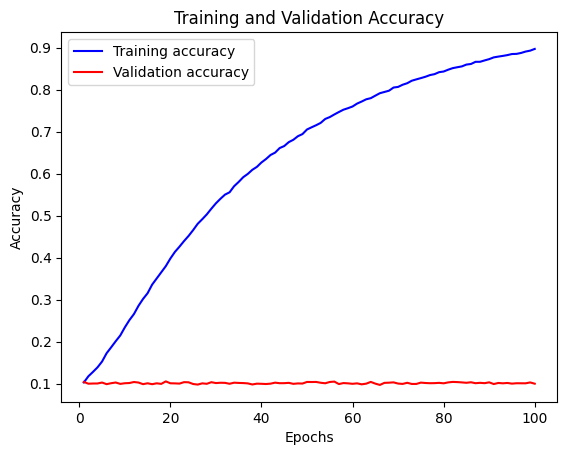

In [93]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, 101)

import matplotlib.pyplot as plt
plt.plot(epochs, train_acc, "b-", label="Training accuracy")
plt.plot(epochs, val_acc, "r-", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### From Tuning key gradient descent parameters, Modify learning rates and check when model fails

In [94]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), #Modify learning rates
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 630.9444 - accuracy: 0.2558 - val_loss: 2.5019 - val_accuracy: 0.1967
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 3.6170 - accuracy: 0.1824 - val_loss: 2.1134 - val_accuracy: 0.2208
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 2.7047 - accuracy: 0.1908 - val_loss: 2.2996 - val_accuracy: 0.2492
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4902 - accuracy: 0.2013 - val_loss: 2.1434 - val_accuracy: 0.2276
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4842 - accuracy: 0.2163 - val_loss: 2.1833 - val_accuracy: 0.2120
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5163 - accuracy: 0.2120 - val_loss: 2.1876 - val_accuracy: 0.2096
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2593 - accuracy: 0.2185 - val_loss: 2.4196 - val_accuracy: 0.22

### Visualize validation loss of the original model, model with lower capacity and model with larger capacity

In [95]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6665 - accuracy: 0.8363 - val_loss: 0.3596 - val_accuracy: 0.9033
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.9025 - val_loss: 0.3110 - val_accuracy: 0.9141
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.9124 - val_loss: 0.2933 - val_accuracy: 0.9177
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.9162 - val_loss: 0.2863 - val_accuracy: 0.9214
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.9186 - val_loss: 0.2771 - val_accuracy: 0.9231
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2856 - accuracy: 0.9203 - val_loss: 0.2761 - val_accuracy: 0.9222
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2811 - accuracy: 0.9223 - val_loss: 0.2713 - val_accuracy: 0.9255
Epoch 

In [96]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3634 - accuracy: 0.8972 - val_loss: 0.1870 - val_accuracy: 0.9463
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1663 - accuracy: 0.9511 - val_loss: 0.1631 - val_accuracy: 0.9554
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1175 - accuracy: 0.9648 - val_loss: 0.1137 - val_accuracy: 0.9672
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0906 - accuracy: 0.9729 - val_loss: 0.1121 - val_accuracy: 0.9678
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0717 - accuracy: 0.9783 - val_loss: 0.1011 - val_accuracy: 0.9706
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.1102 - val_accuracy: 0.9687
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.1000 - val_accuracy: 0.9713
Epoch 

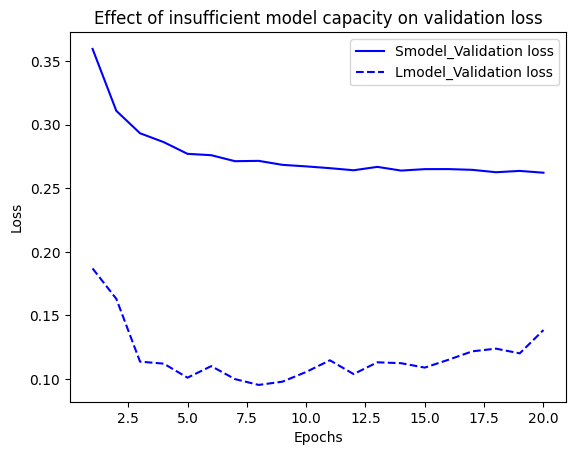

In [97]:
import matplotlib.pyplot as plt
smodel_val_loss = history_small_model.history["val_loss"]
lmodel_val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, smodel_val_loss, "b-",
         label="Smodel_Validation loss")
plt.plot(epochs, lmodel_val_loss, "b--",
         label="Lmodel_Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Visualize validation loss of the original model and model with dropout

In [98]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 129ms/step - loss: 0.5135 - accuracy: 0.7877 - val_loss: 0.3922 - val_accuracy: 0.8578
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3153 - accuracy: 0.8963 - val_loss: 0.3090 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2300 - accuracy: 0.9237 - val_loss: 0.3129 - val_accuracy: 0.8719
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1881 - accuracy: 0.9364 - val_loss: 0.2750 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1558 - accuracy: 0.9498 - val_loss: 0.2803 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1327 - accuracy: 0.9573 - val_loss: 0.3325 - val_accuracy: 0.8722
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1141 - accuracy: 0.9646 - val_loss: 0.4074 - val_accuracy: 0.8523
Epoch 8/20
3

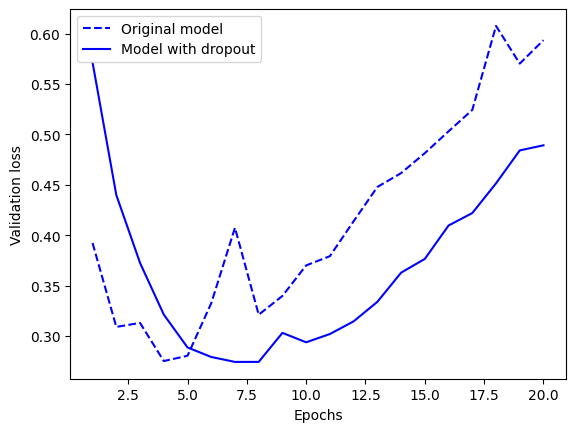

In [99]:
import matplotlib.pyplot as plt

val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b--", label="Original model")
plt.plot(epochs, val_loss_dropout, "b-", label="Model with dropout")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

# Multi input and output

### 다중 입력, 다중 출력 함수형 모델

In [100]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4
#모델의 입력을 정의
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")
#입력특성을 하나의 텐서 features로 연결
features = layers.Concatenate()([title, text_body, tags])
#중간층을 적용
features = layers.Dense(64, activation="relu")(features)
#모델의 출력을 정의
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)
#입력과 출력을 지정하여 모델생성
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

**입력과 타깃 배열 리스트를 전달하여 모델 훈련하기**

In [101]:
import numpy as np

num_samples = 1280
#더미 입력데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))
#더미 타겟데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 7ms/step


**입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기(입력 순서에 신경 쓰고 싶지 않을때(입, 출력이 많은 경우)**

In [102]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 7ms/step


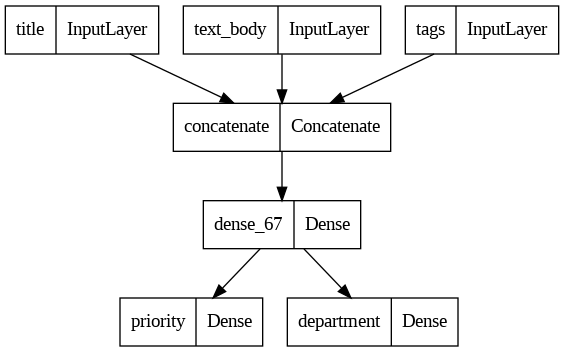

In [103]:
keras.utils.plot_model(model, "ticket_classifier.png")

### 다중 입력,다중 출력 함수형모델 변형하기

In [104]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)
features = layers.Dense(36, activation="relu")(features)
features = layers.Dense(24, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [105]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 7ms/step


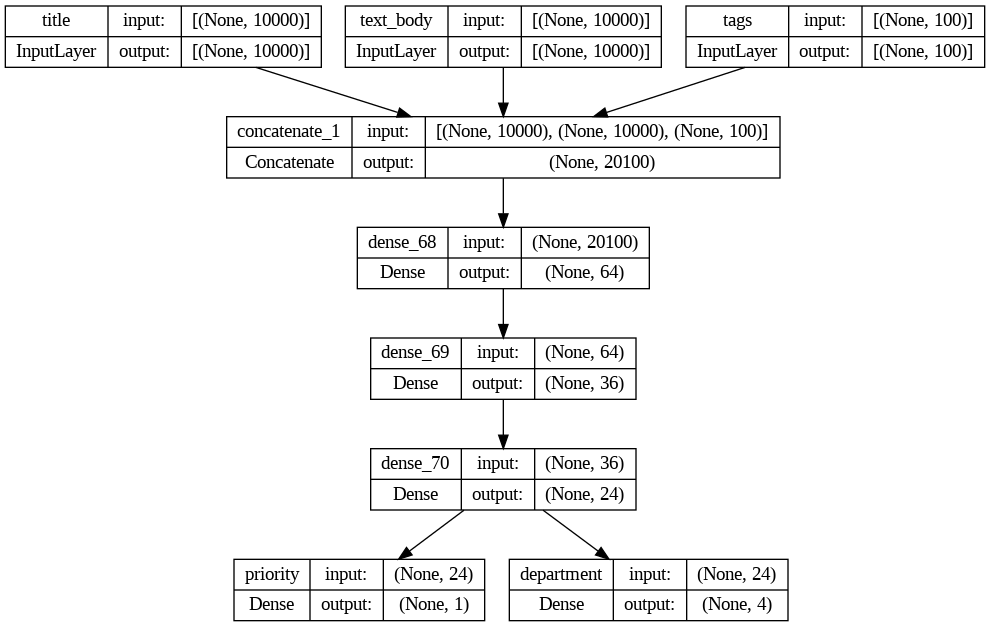

In [106]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

### 중간 층의 아웃풋 재사용해서 새로운모델 만들기

In [107]:
features = model.layers[5].output #5번레이어의 아웃풋에 층추가
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

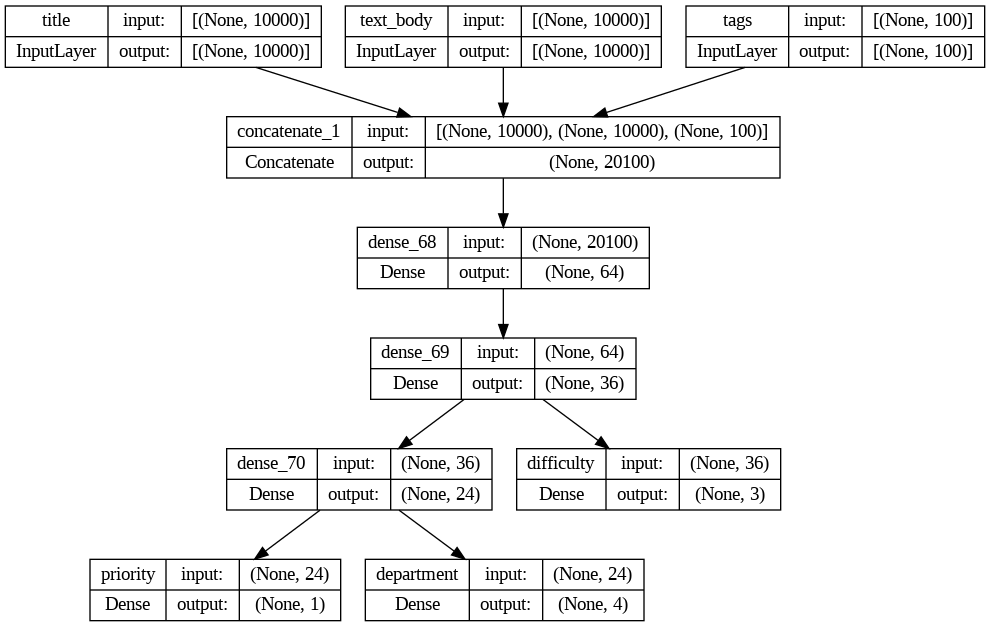

In [108]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### 모델 훈련을 위한 랜덤데이터 만들기

In [109]:
import numpy as np

vocabulary_size = 10000
num_tags = 100
num_departments = 4
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) #0이상 2미만 랜덤정수
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))


### 표준 워크플로: `compile()`, `fit()`, `evaluate()`, `predict()` 사용

In [110]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2945 - accuracy: 0.9123 - val_loss: 0.1472 - val_accuracy: 0.9581
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1617 - accuracy: 0.9540 - val_loss: 0.1124 - val_accuracy: 0.9687
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


#### 사용자정의 지표

In [111]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [112]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2934 - accuracy: 0.9121 - rmse: 7.1753 - val_loss: 0.1431 - val_accuracy: 0.9591 - val_rmse: 7.3607
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1585 - accuracy: 0.9539 - rmse: 7.3516 - val_loss: 0.1199 - val_accuracy: 0.9672 - val_rmse: 7.4042
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.9753 - rmse: 7.4333


#### 콜백사용하기

In [113]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.h5",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2956 - accuracy: 0.9129 - val_loss: 0.1512 - val_accuracy: 0.9559
Epoch 2/10
  19/1563 [..............................] - ETA: 8s - loss: 0.1773 - accuracy: 0.9408

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 11s 7ms/step - loss: 0.1607 - accuracy: 0.9537 - val_loss: 0.1193 - val_accuracy: 0.9673
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1282 - accuracy: 0.9635 - val_loss: 0.1042 - val_accuracy: 0.9738
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1139 - accuracy: 0.9679 - val_loss: 0.0998 - val_accuracy: 0.9740
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1013 - accuracy: 0.9717 - val_loss: 0.1037 - val_accuracy: 0.9736
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0960 - accuracy: 0.9734 - val_loss: 0.0972 - val_accuracy: 0.9762
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0898 - accuracy: 0.9762 - val_loss: 0.0880 - val_accuracy: 0.9773
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0835 - accuracy: 0.9771 - val_loss: 0.0884 - val_accuracy: 0.9

### 완전한 훈련과 평가 루프

In [114]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

In [115]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [116]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9132
...loss: 0.2909
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9541
...loss: 0.1613
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9622
...loss: 0.1327


#### Set batch size as 100

In [117]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(100)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9720
...loss: 0.0976
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9748
...loss: 0.0872
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9776
...loss: 0.0776


#### modify your built-in training loop to output logs for every batch updates

In [118]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(100)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for step, (inputs_batch, targets_batch) in enumerate(training_dataset):
        logs = train_step(inputs_batch, targets_batch)
        print(f"{epoch}번째 에포크 {step}번째 배치 결과")
        for key, value in logs.items():
            print(f"...{key}: {value:.4f}")


0번째 에포크 0번째 배치 결과
...sparse_categorical_accuracy: 0.9500
...loss: 0.2195
0번째 에포크 1번째 배치 결과
...sparse_categorical_accuracy: 0.9700
...loss: 0.1471
0번째 에포크 2번째 배치 결과
...sparse_categorical_accuracy: 0.9600
...loss: 0.1425
0번째 에포크 3번째 배치 결과
...sparse_categorical_accuracy: 0.9650
...loss: 0.1203
0번째 에포크 4번째 배치 결과
...sparse_categorical_accuracy: 0.9700
...loss: 0.1050
0번째 에포크 5번째 배치 결과
...sparse_categorical_accuracy: 0.9733
...loss: 0.0929
0번째 에포크 6번째 배치 결과
...sparse_categorical_accuracy: 0.9757
...loss: 0.0836
0번째 에포크 7번째 배치 결과
...sparse_categorical_accuracy: 0.9762
...loss: 0.0820
0번째 에포크 8번째 배치 결과
...sparse_categorical_accuracy: 0.9767
...loss: 0.0786
0번째 에포크 9번째 배치 결과
...sparse_categorical_accuracy: 0.9740
...loss: 0.0876
0번째 에포크 10번째 배치 결과
...sparse_categorical_accuracy: 0.9745
...loss: 0.0880
0번째 에포크 11번째 배치 결과
...sparse_categorical_accuracy: 0.9767
...loss: 0.0817
0번째 에포크 12번째 배치 결과
...sparse_categorical_accuracy: 0.9777
...loss: 0.0783
0번째 에포크 13번째 배치 결과
...sparse_categorical_accurac

#### Modify your training run on GPUs

In [119]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

@tf.function #훈련 스텝 함수에 `@tf.function` 데코레이터 추가하기
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs